In [1]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import folium
import json

In [2]:
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 엑셀 파일 경로 설정
excel_file = 'sprint2_base/행정구역별 전력거래량(07~21).xlsx'

# 엑셀 파일에서 시트를 불러오기
locconelec_df = pd.read_excel(excel_file)

# 불러온 데이터 출력
print(locconelec_df)

      연도            서울            부산            대구            인천           광주   
0   2007  4.297282e+07  1.790574e+07  1.292589e+07  1.944655e+07  6803616.263  \
1   2008  4.409635e+07  1.870938e+07  1.326525e+07  1.991537e+07  7044867.682   
2   2009  4.498446e+07  1.868944e+07  1.313373e+07  2.003212e+07  7169714.965   
3   2010  4.729509e+07  2.026368e+07  1.448000e+07  2.182758e+07  7860056.931   
4   2011  4.690299e+07  2.056198e+07  1.482195e+07  2.224114e+07  8047388.135   
5   2012  4.723410e+07  2.066484e+07  1.495496e+07  2.265195e+07  8130493.269   
6   2013  4.655511e+07  2.036471e+07  1.508005e+07  2.267344e+07  8274074.487   
7   2014  4.501886e+07  1.998090e+07  1.485879e+07  2.257805e+07  8197277.025   
8   2015  4.538148e+07  2.000231e+07  1.494771e+07  2.321177e+07  8333872.511   
9   2016  4.649323e+07  2.046709e+07  1.526811e+07  2.387586e+07  8558369.000   
10  2017  4.629816e+07  2.100736e+07  1.538637e+07  2.451531e+07  8683649.000   
11  2018  4.781021e+07  2.12

In [4]:
locconelec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     int64  
 1   서울      15 non-null     float64
 2   부산      15 non-null     float64
 3   대구      15 non-null     float64
 4   인천      15 non-null     float64
 5   광주      15 non-null     float64
 6   대전      15 non-null     float64
 7   울산      15 non-null     float64
 8    세종     15 non-null     float64
 9   경기      15 non-null     float64
 10  강원      15 non-null     float64
 11  충북      15 non-null     float64
 12   충남     15 non-null     float64
 13  전북      15 non-null     float64
 14  전남      15 non-null     float64
 15  경북      15 non-null     float64
 16   경남     15 non-null     float64
 17   제주     15 non-null     float64
 18  계       15 non-null     float64
dtypes: float64(18), int64(1)
memory usage: 2.4 KB


In [5]:
locconelec_df.drop(columns = ['계'], inplace = True)

In [6]:
locconelec_df = pd.DataFrame(locconelec_df)
locconelec_df

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2007,4.297282e+07,1.790574e+07,1.292589e+07,1.944655e+07,6803616.263,7823147.339,2.273954e+07,0.000,7.810728e+07,1.356782e+07,1.667810e+07,2.805114e+07,1.516607e+07,2.034140e+07,3.624973e+07,2.678826e+07,3038325.028
1,2008,4.409635e+07,1.870938e+07,1.326525e+07,1.991537e+07,7044867.682,8087633.033,2.413218e+07,0.000,8.184857e+07,1.389575e+07,1.737504e+07,3.042797e+07,1.592780e+07,2.186819e+07,3.716480e+07,2.807497e+07,3183209.759
2,2009,4.498446e+07,1.868944e+07,1.313373e+07,2.003212e+07,7169714.965,8224740.590,2.468255e+07,0.000,8.374350e+07,1.399212e+07,1.759165e+07,3.211547e+07,1.668430e+07,2.358947e+07,3.798331e+07,2.839304e+07,3352343.406
3,2010,4.729509e+07,2.026368e+07,1.448000e+07,2.182758e+07,7860056.931,8867404.745,2.651570e+07,0.000,9.307487e+07,1.484803e+07,1.944484e+07,3.880931e+07,1.894907e+07,2.505993e+07,4.158905e+07,3.154922e+07,3574624.451
4,2011,4.690299e+07,2.056198e+07,1.482195e+07,2.224114e+07,8047388.135,9059776.301,2.819824e+07,0.000,9.684450e+07,1.587604e+07,2.045336e+07,4.265011e+07,2.116836e+07,2.713687e+07,4.416730e+07,3.307121e+07,3710079.721
5,2012,4.723410e+07,2.066484e+07,1.495496e+07,2.265195e+07,8130493.269,9160107.085,2.936272e+07,578610.118,1.002920e+08,1.590438e+07,2.136191e+07,4.449241e+07,2.146233e+07,2.848472e+07,4.479952e+07,3.301495e+07,3864639.132
6,2013,4.655511e+07,2.036471e+07,1.508005e+07,2.267344e+07,8274074.487,9225139.981,2.999297e+07,2345526.777,1.022271e+08,1.579474e+07,2.166504e+07,4.546681e+07,2.170865e+07,3.030207e+07,4.544425e+07,3.353062e+07,4094899.709
7,2014,4.501886e+07,1.998090e+07,1.485879e+07,2.257805e+07,8197277.025,9102523.627,3.011512e+07,2437031.076,1.021807e+08,1.577814e+07,2.217926e+07,4.729496e+07,2.229741e+07,3.172294e+07,4.601636e+07,3.343516e+07,4220090.219
8,2015,4.538148e+07,2.000231e+07,1.494771e+07,2.321177e+07,8333872.511,9182737.221,3.028614e+07,2641139.384,1.050480e+08,1.620662e+07,2.294903e+07,4.728606e+07,2.208686e+07,3.263783e+07,4.495684e+07,3.387633e+07,4429553.218
9,2016,4.649323e+07,2.046709e+07,1.526811e+07,2.387586e+07,8558369.000,9379633.000,3.209522e+07,2801869.000,1.094039e+08,1.649877e+07,2.400886e+07,4.845393e+07,2.273350e+07,3.309690e+07,4.464750e+07,3.449748e+07,4738201.000


In [7]:
# 연도를 기준으로 index 변경
locconelec_df.set_index("연도", inplace=True)
print(locconelec_df)

                서울            부산            대구            인천           광주   
연도                                                                          
2007  4.297282e+07  1.790574e+07  1.292589e+07  1.944655e+07  6803616.263  \
2008  4.409635e+07  1.870938e+07  1.326525e+07  1.991537e+07  7044867.682   
2009  4.498446e+07  1.868944e+07  1.313373e+07  2.003212e+07  7169714.965   
2010  4.729509e+07  2.026368e+07  1.448000e+07  2.182758e+07  7860056.931   
2011  4.690299e+07  2.056198e+07  1.482195e+07  2.224114e+07  8047388.135   
2012  4.723410e+07  2.066484e+07  1.495496e+07  2.265195e+07  8130493.269   
2013  4.655511e+07  2.036471e+07  1.508005e+07  2.267344e+07  8274074.487   
2014  4.501886e+07  1.998090e+07  1.485879e+07  2.257805e+07  8197277.025   
2015  4.538148e+07  2.000231e+07  1.494771e+07  2.321177e+07  8333872.511   
2016  4.649323e+07  2.046709e+07  1.526811e+07  2.387586e+07  8558369.000   
2017  4.629816e+07  2.100736e+07  1.538637e+07  2.451531e+07  8683649.000   

In [8]:
locconelec_df.columns=['서울시','부산시','대구시','인천시','광주시', '대전시', '울산시', '세종시', 
                       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도']

In [9]:
locconelec_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2007,4.297282e+07,1.790574e+07,1.292589e+07,1.944655e+07,6803616.263,7823147.339,2.273954e+07,0.000,7.810728e+07,1.356782e+07,1.667810e+07,2.805114e+07,1.516607e+07,2.034140e+07,3.624973e+07,2.678826e+07,3038325.028
2008,4.409635e+07,1.870938e+07,1.326525e+07,1.991537e+07,7044867.682,8087633.033,2.413218e+07,0.000,8.184857e+07,1.389575e+07,1.737504e+07,3.042797e+07,1.592780e+07,2.186819e+07,3.716480e+07,2.807497e+07,3183209.759
2009,4.498446e+07,1.868944e+07,1.313373e+07,2.003212e+07,7169714.965,8224740.590,2.468255e+07,0.000,8.374350e+07,1.399212e+07,1.759165e+07,3.211547e+07,1.668430e+07,2.358947e+07,3.798331e+07,2.839304e+07,3352343.406
2010,4.729509e+07,2.026368e+07,1.448000e+07,2.182758e+07,7860056.931,8867404.745,2.651570e+07,0.000,9.307487e+07,1.484803e+07,1.944484e+07,3.880931e+07,1.894907e+07,2.505993e+07,4.158905e+07,3.154922e+07,3574624.451
2011,4.690299e+07,2.056198e+07,1.482195e+07,2.224114e+07,8047388.135,9059776.301,2.819824e+07,0.000,9.684450e+07,1.587604e+07,2.045336e+07,4.265011e+07,2.116836e+07,2.713687e+07,4.416730e+07,3.307121e+07,3710079.721
2012,4.723410e+07,2.066484e+07,1.495496e+07,2.265195e+07,8130493.269,9160107.085,2.936272e+07,578610.118,1.002920e+08,1.590438e+07,2.136191e+07,4.449241e+07,2.146233e+07,2.848472e+07,4.479952e+07,3.301495e+07,3864639.132
2013,4.655511e+07,2.036471e+07,1.508005e+07,2.267344e+07,8274074.487,9225139.981,2.999297e+07,2345526.777,1.022271e+08,1.579474e+07,2.166504e+07,4.546681e+07,2.170865e+07,3.030207e+07,4.544425e+07,3.353062e+07,4094899.709
2014,4.501886e+07,1.998090e+07,1.485879e+07,2.257805e+07,8197277.025,9102523.627,3.011512e+07,2437031.076,1.021807e+08,1.577814e+07,2.217926e+07,4.729496e+07,2.229741e+07,3.172294e+07,4.601636e+07,3.343516e+07,4220090.219
2015,4.538148e+07,2.000231e+07,1.494771e+07,2.321177e+07,8333872.511,9182737.221,3.028614e+07,2641139.384,1.050480e+08,1.620662e+07,2.294903e+07,4.728606e+07,2.208686e+07,3.263783e+07,4.495684e+07,3.387633e+07,4429553.218


In [10]:
locconelec_df = locconelec_df.astype(int)

In [11]:
locconelec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2007 to 2021
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     15 non-null     int32
 1   부산시     15 non-null     int32
 2   대구시     15 non-null     int32
 3   인천시     15 non-null     int32
 4   광주시     15 non-null     int32
 5   대전시     15 non-null     int32
 6   울산시     15 non-null     int32
 7   세종시     15 non-null     int32
 8   경기도     15 non-null     int32
 9   강원도     15 non-null     int32
 10  충청북도    15 non-null     int32
 11  충청남도    15 non-null     int32
 12  전라북도    15 non-null     int32
 13  전라남도    15 non-null     int32
 14  경상북도    15 non-null     int32
 15  경상남도    15 non-null     int32
 16  제주도     15 non-null     int32
dtypes: int32(17)
memory usage: 1.1 KB


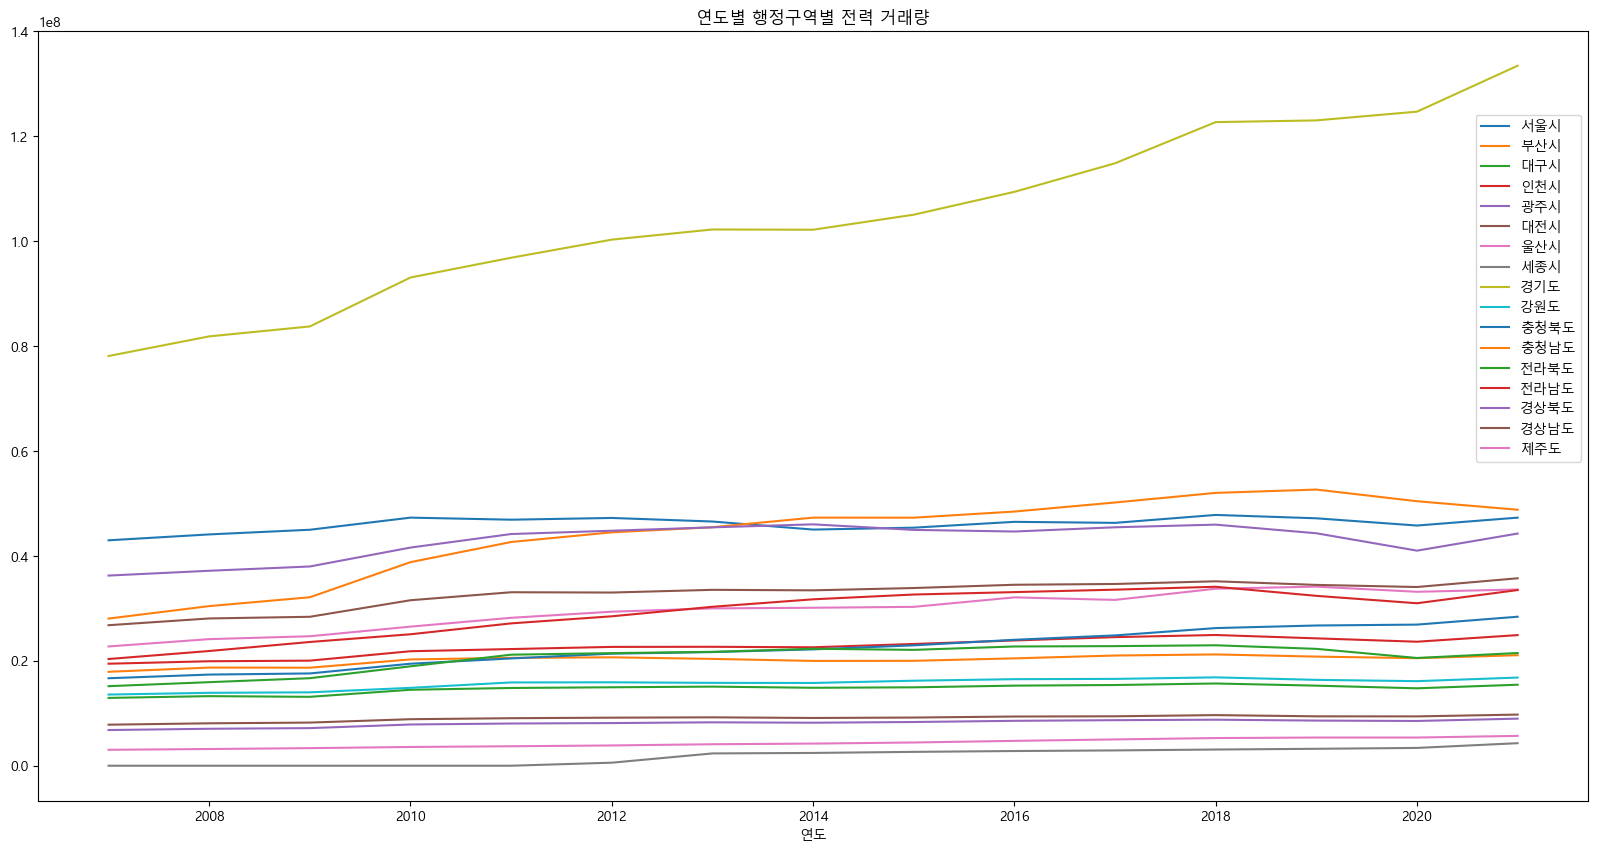

In [12]:
# 꺾은 선 그래프 그리기
locconelec_df.plot(figsize=(20, 10))
plt.legend(loc='upper right', bbox_to_anchor = (1, 0.9))
plt.title('연도별 행정구역별 전력 거래량')
plt.show()

In [14]:
# 연도별 전력거래량 추출
locconelec_year = []
for i in range(15) :
    locconelec_year.append(locconelec_df.iloc[i:i+1])


In [15]:
locconelec_year[5]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2012,47234102,20664842,14954957,22651946,8130493,9160107,29362724,578610,100291952,15904382,21361911,44492412,21462325,28484718,44799524,33014947,3864639


In [16]:
# 대한민국 지도 데이터 불러오기
jsonfile = open('sprint2_base/TL_SCCO_CTPRVN.json', 'r', 
                encoding='utf8').read()
jsondata = json.loads(jsonfile)


In [17]:
### 지도맵 그리기
electronic_map = folium.Map(
    ### 최초에 보여줄 지도위치(위/경도) 지정
    # - 최초에 중심점을 기준으로 지도가 그려짐
    location = [37.573050, 126.979189],

    ### 지도 스타일 지정하기
    # - 도시형 건물, 산림, 하천/도로 등 스타일 지정
    # openstreetmap : 도시형 건물 스타일(가장 일반적으로 사용됨)
    tiles = "openstreetmap",

    ### 최초에 화면에 보여질 스케일(zoom) 지정하기
    zoom_start = 6.5
)

electronic_map

In [18]:
# 지역별 구분 시각화
folium.GeoJson(jsondata, name='시도').add_to(electronic_map)
electronic_map

In [19]:
locconelec_year[5].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2012 to 2012
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     1 non-null      int32
 1   부산시     1 non-null      int32
 2   대구시     1 non-null      int32
 3   인천시     1 non-null      int32
 4   광주시     1 non-null      int32
 5   대전시     1 non-null      int32
 6   울산시     1 non-null      int32
 7   세종시     1 non-null      int32
 8   경기도     1 non-null      int32
 9   강원도     1 non-null      int32
 10  충청북도    1 non-null      int32
 11  충청남도    1 non-null      int32
 12  전라북도    1 non-null      int32
 13  전라남도    1 non-null      int32
 14  경상북도    1 non-null      int32
 15  경상남도    1 non-null      int32
 16  제주도     1 non-null      int32
dtypes: int32(17)
memory usage: 76.0 bytes


In [20]:
locconelec_year[5]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2012,47234102,20664842,14954957,22651946,8130493,9160107,29362724,578610,100291952,15904382,21361911,44492412,21462325,28484718,44799524,33014947,3864639


In [21]:
# 데이터 형태 회전
locconelec_2012_df = locconelec_year[5].T

In [22]:
locconelec_2012_df

연도,2012
서울시,47234102
부산시,20664842
대구시,14954957
인천시,22651946
광주시,8130493
대전시,9160107
울산시,29362724
세종시,578610
경기도,100291952
강원도,15904382


In [23]:
# 데이터 컬럼 형태 확인
locconelec_2012_df.columns

Index([2012], dtype='int64', name='연도')

In [24]:
# 데이터 이름 재설정 및 수정
locconelec_2012_df.rename(columns={2012:'전력거래량'}, inplace=True)

In [25]:
locconelec_2012_df

연도,전력거래량
서울시,47234102
부산시,20664842
대구시,14954957
인천시,22651946
광주시,8130493
대전시,9160107
울산시,29362724
세종시,578610
경기도,100291952
강원도,15904382


In [26]:
locconelec_2012_df.index

Index(['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', '경기도', '강원도',
       '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'],
      dtype='object')

In [27]:
# 인덱스 초기화하여 인덱스로 되어있는 지역명을 칼럼으로 변환
locconelec_2012_df = locconelec_2012_df.reset_index()

In [28]:
# 'index' 명을 '지역명'으로 컬럼명 재설정
locconelec_2012_df = locconelec_2012_df.rename(columns={'index': '지역명'})

In [29]:
locconelec_2012_df

연도,지역명,전력거래량
0,서울시,47234102
1,부산시,20664842
2,대구시,14954957
3,인천시,22651946
4,광주시,8130493
5,대전시,9160107
6,울산시,29362724
7,세종시,578610
8,경기도,100291952
9,강원도,15904382


In [30]:
# columns = ['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', 
#            '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'], # DataFrame의 어떤 columns을 넣을지

In [31]:
folium.Choropleth(
    geo_data = jsondata, # 경계선 좌표값이 담긴 데이터
    data = locconelec_2012_df, # Series or DataFrame 넣으면 된다
    columns = ['지역명','전력거래량' ], # DataFrame의 어떤 columns을 넣을지
    key_on = 'feature.properties.CTP_KOR_NM', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color = 'YlOrRd',
    fill_opacity = 0.6, # 색 투명도
    line_opacity = 0.6, # 선 투명도
    legend_name = '2012년 전력거래량', # 범례
    highlight=True,
).add_to(electronic_map)
electronic_map

In [32]:
locconelec_2012_df

연도,지역명,전력거래량
0,서울시,47234102
1,부산시,20664842
2,대구시,14954957
3,인천시,22651946
4,광주시,8130493
5,대전시,9160107
6,울산시,29362724
7,세종시,578610
8,경기도,100291952
9,강원도,15904382


In [33]:
# 전력거래량을 기준으로 내림차순으로 정리
locconelec_2012_df = locconelec_2012_df.sort_values(by='전력거래량')



In [34]:
locconelec_2012_df

연도,지역명,전력거래량
7,세종시,578610
16,제주도,3864639
4,광주시,8130493
5,대전시,9160107
2,대구시,14954957
9,강원도,15904382
1,부산시,20664842
10,충청북도,21361911
12,전라북도,21462325
3,인천시,22651946


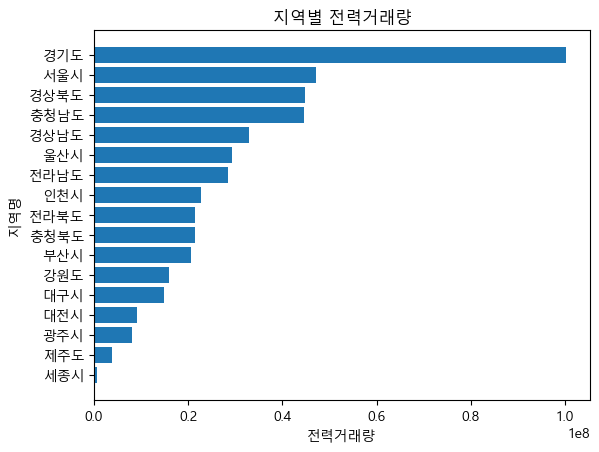

<Figure size 2000x2000 with 0 Axes>

In [35]:
# 지역별 전력거래량 내림차순으로 바그래프로 변
# 데이터 준비
x = locconelec_2012_df['지역명']
y = locconelec_2012_df['전력거래량']

# 바 그래프 그리기
plt.barh(x, y)

# 그래프 제목 설정
plt.title('지역별 전력거래량')

# x축, y축 라벨 설정
plt.xlabel('전력거래량')
plt.ylabel('지역명')

# 그래프 크기 조정
plt.figure(figsize=(20, 20))

# 그래프 출력
plt.show()
